### 2層ニューラルネットワークの実装 (簡易版)
http://wild-data-chase.com/index.php/2018/12/16/post-252/

#### パーセプトロンとニューラルネットワークの違いとは
実は、パーセプトロンとニューラルネットワークとは本質的には同じ構造のアルゴリズムを指します。\
入力を受け取り、重みを掛け合わせ、バイアスを足し上げ、その総和を算出し、それを活性化関数に渡し、結果を出力として受け取る、という構造は両者において共通です。\
ではどの点で異なるのかと言えば、活性化関数の性質の違いに両者の相違を認めることができます。

パーセプトロンで用いられる活性化関数は、ステップ関数です。\
ステップ関数では、入力が閾値を超過しているか否かで出力を0か1に振り分けていました。

対して、ニューラルネットワークで用いられる活性化関数は、入力に応じて連続に変化する値を出力できる関数です。\
例えばシグモイド関数や、ソフトマックス関数です。

ニューラルネットワークでは、ニューロンと呼ばれる要素（ノードとも）を多数用意して処理を行いますが、ニューロンに渡す入力を0か1に限定してしまうと効率的なネットワークを構築できません。\
したがってニューラルネットワークでは連続値を出力できる活性化関数を用いるのであり、それがパーセプトロンとの違いとなっているのでした。

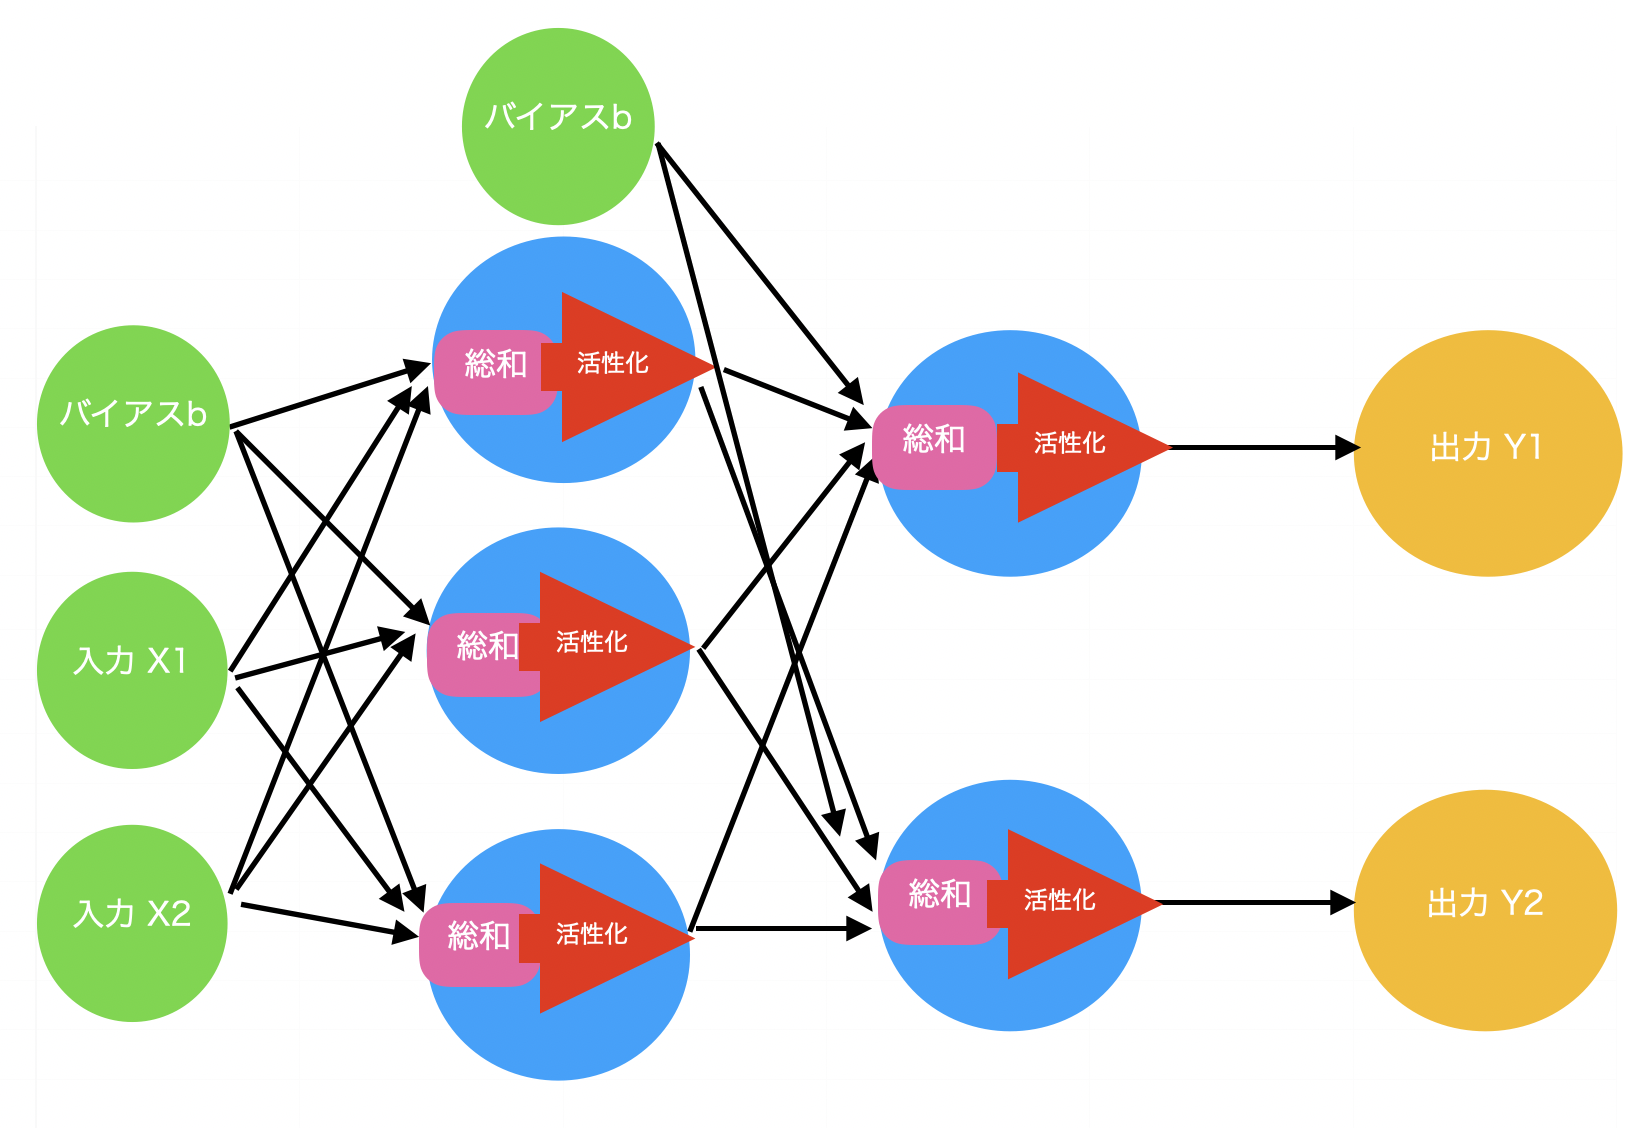

#### 処理の流れ
1. 各入力（０層）に重みを乗算、それにバイアスを加算し、総和を求める（緑$\rightarrow$ピンク）
- ネットワークには各入力に応じた重み（W1, W2 など）が用意されています
- パーセプトロンの時と同じように、各入力と対応した重みを乗算し、それにバイアスを足し上げ、総和を求めます

\\
2. １.の処理を、次の層（１層）に存在するニューロンの数だけ行う
- 先ほどの総和を求めた処理を、次の層に存在する隠れ層の数だけ行う必要があります
- したがって、１層目一番上の青色ニューロンに渡す総和が\
$\left( X_1 \cdot W_{1-1} + X_2 \cdot W_{1-2} + b \right)$\
とすると、次の青色ニューロンに渡す総和は\
$\left( X_1 \cdot W_{2-1} + X_2 \cdot W_{2-2} + b \right)$\
となります

\\
3. １層の各ニューロンに渡された総和を活性化関数に渡し、出力する（ピンク$\rightarrow$赤）
- ここまでで、１層目のニューロンに総和が渡されています
- その総和を引数に、活性化関数に処理を行わせます
- ここではシグモイド関数を使用しますので、１層目の各ニューロンからの出力は３者３様となります

\\
4. １層の活性化関数の出力と次のバイアスとを次の入力値として、今度は２層の重みと乗算し、総和を求める（赤・緑$\rightarrow$ピンク）
- ２層との処理では今度の入力値は、１層めの活性化関数からの出力になります
- 2.と同様に総和を求めて、次のニューロンへと渡します

\\
5. ２層のニューロンに渡された総和を活性化関数に渡し、出力する（ピンク$\rightarrow$赤）
- ２層に到達した総和は、再度活性化関数によって処理されます
- すでに処理が不要である場合には、ここでの活性化関数の使用は省略されることもあります（あるいは恒等関数と呼ばれる、処理を何も行わない関数を使用する）

\\
6. ２層の活性化関数からの出力を、全体の出力とする
- 今回は２層分のニューロンしか無いので、２層目のニューロンの出力結果が全体の出力結果となります

In [ ]:
import numpy as np
import matplotlib.pylab as plt
 
# ２層ニューラルネットワーク
## 入力　：２つ
## 隠れ層：２層
## 出力　：２つ

In [ ]:
# 活性化関数：シグモイド
def sigmoid(x):
  return 1 / 1 + np.exp(-x)

In [ ]:
# ネットワークの初期化関数
## ２層分の重みとバイアスを設定する

def init_network():
  network = {}
    
  #１層目の重み。入力が２つで、次のニューロン数が３なので、２行３列
  network['W1'] = np.array([[0.1, 0.3, 0.5],
                            [0.2, 0.4, 0.6]])
    
  #２層目の重み。入力が３つで、次のニューロン数が２なので、３行２列
  network['W2'] = np.array([[0.3, 0.5],
                            [0.1, 0.2],
                            [0.3, 0.4]])  
 
  #１層目のバイアス。乗算を行わないので行は１、次のニューロン数が３なので、１行３列
  network['b1'] = np.array([0.1, 0.2, 0.3]) 
    
  #１層目のバイアス。乗算を行わないので行は１、次のニューロン数が２なので、１行２列
  network['b2'] = np.array([0.2, 0.3])
     
  return network

In [ ]:
# 出力の実行関数
## network : 使用するニューラルネットワーク
## x       : 入力値。１行列を想定。

def calculate(network, x):
  # 重みとバイアスの呼び出し
  W1, W2 = network['W1'], network['W2']
  b1, b2 = network['b1'], network['b2']
    
  # １層目の計算
  ## 入力値に重みとバイアスを適用。重みが３次元であるので、出力も３次元。
  ### 関数dotは行列の積を求める関数
  a1 = np.dot(x, W1) + b1
  ## 出力にシグモイド関数を適用
  z1 = sigmoid(a1)
    
  # ２層目の計算
  ## １層目の出力を入力値として、重みとバイアスを適用。W2は二次元であるので、今度の出力は２次元。
  a2 = np.dot(a1, W2) + b2
  ## 出力にシグモイド関数を適用
  z2 = sigmoid(a2)
        
  ## 出力を返却（今回は最後の出力に活性化を行わない）
  return a2

In [ ]:
# ネットワークの初期化
network = init_network()
 
# 計算の実行。入力は [1,2]
x = np.array([0.1, 0.2])
y = calculate(network, x)
    
# 結果の出力
print("入力 {} を２層ニューラルネットワークに渡した時の出力 : {}".format(x, y))

### ゼロから作るDeep Learning 
https://tawara.hatenablog.com/entry/2016/10/30/DeepLearningFromZero-03

In [ ]:
# σ()を定義。ここでは恒等関数を用いる
def indentify_function(x):
  y = x
  return x

In [ ]:
## 3層ニューラルネットワークの実装
class ThreeLayerNN:
  # 初期化で重みの行列とバイアス項のベクトルを渡す
  def __init__(self, Weight1, Weight2, Weight3, bias1, bias2, bias3):
    self.W1 = Weight1
    self.W2 = Weight2
    self.W3 = Weight3
    self.b1 = bias1
    self.b2 = bias2
    self.b3 = bias3

  # NNによって入力xを出力yに変換
  def forward(self, x):
    ## 第0層 -> 第1層
    a1 = self.W1.dot(x) + self.b1
    z1 = sigmoid(a1)

    ## 第1層 -> 第2層
    a2 = self.W2.dot(z1) + self.b2
    z2 = sigmoid(a2)

    ## 第2層 -> 第3層
    a3 = self.W3.dot(z2) + self.b3
    y = indentify_function(a3)

    ## 出力
    return y

In [ ]:
import numpy as np

### 本に習って重み・バイアスを設定
W1 = np.arange(0.1,0.65,0.1).reshape(3,2)
b1 = np.linspace(0.1,0.3,3)
W2 = np.arange(0.1,0.65,0.1).reshape(2,3)
b2 = np.linspace(0.1,0.2,2)
W3 = np.arange(0.1,0.45,0.1).reshape(2,2)
b3 = np.linspace(0.1,0.2,2)

print("W1:\n",W1)
print("b1:\n",b1)
print("W2:\n",W2)
print("b2:\n",b2)
print("W3:\n",W3)
print("b3:\n",b3)

In [ ]:
### 3層NNの初期化
instNN = ThreeLayerNN(W1,W2,W3,b1,b2,b3)

### 入力xをつっこむ
x = np.array([1.0,0.5])
y = instNN.forward(x)
print("y:\n",y)

In [ ]:
# ソフトマックス関数
def softmax(a):
  # オーバーフロー対策のためにベクトルaの最大要素を求める
  c = a.max() # np.amaxと同じ機能.

  # 最大要素を引いてからexpをかけることでオーバーフローを回避
  exp_a = np.exp(a - c)
  # 和を計算
  sum_exp_a = exp_a.sum()
  # 出力yを計算
  y = exp_a / sum_exp_a

  return y

In [ ]:
### 実行
a = np.array([100024.,100025.,100027.])
y = softmax(a)

print("normal:\n", a / a.sum())
print("y:\n", y)

### ニューラルネットワークの基礎
https://tutorials.chainer.org/ja/13_Basics_of_Neural_Networks.html

In [ ]:
import numpy as np

# 入力
x = np.array([2, 3, 1])

# 正解
t = np.array([20])

In [ ]:
# 0-1層間のパラメータ
w1 = np.array([[3, 1, 2], [-2, -3, -1]])
b1 = np.array([0, 0])

# 2-3層間のパラメータ
w2 = np.array([[3, 2]])
b2 = np.array([0])

In [ ]:
# 中間層の計算
u1 = w1.dot(x) + b1
h1 = 1. / (1 + np.exp(-u1))

# 出力の計算
y = w2.dot(h1) + b2

print(y)

In [ ]:
# dL / dy
dLdy = -2 * (t - y)

# dy / dw_2
dydw2 = h1

In [ ]:
# dL / dw_2: 求めたい勾配
dLdw2 = dLdy * dydw2

print(dLdw2)

In [ ]:
# d y / d h1
dydh1 = w2

# d h1 / d u1
dh1du1 = h1 * (1 - h1)

# d u_1 / d w1
du1dw1 = x

# 上から du1 / dw1 の直前までを一旦計算
dLdu1 = dLdy * dydh1 * dh1du1

# du1dw1は (3,) というshapeなので、g_u1w1[None]として(1, 3)に変形
du1dw1 = du1dw1[None]

# dL / dw_1: 求めたい勾配
dLdw1 = dLdu1.T.dot(du1dw1)

print(dLdw1)

In [ ]:
## 試しに Chainer を使って同じ勾配の計算を行い、NumPy を使ったコードと結果が一致するかどうかチェック

import chainer
import chainer.functions as F
import chainer.links as L

# 1-2層間のパラメータ
w1 = np.array([[3, 1, 2], [-2, -3, -1]], dtype=np.float32)
b1 = np.array([0, 0], dtype=np.float32)

l1 = L.Linear(2, initialW=w1, initial_bias=b1)

# 2-3層間のパラメータ
w2 = np.array([[3, 2]], dtype=np.float32)
b2 = np.array([0], dtype=np.float32)

l2 = L.Linear(1, initialW=w2, initial_bias=b2)

# 入力
x = np.array([[2, 3, 1]], dtype=np.float32)

# 出力
y = l2(F.sigmoid(l1(x)))
print(y)
# => should be [2.99995156]

# 正解
t = np.array([[20.]], dtype=np.float32)

# ロス
loss = F.mean_squared_error(y, t)

# dLdw_2
print(chainer.grad([loss], [l2.W]))
# => should be [-3.39995290e+01 -2.82720335e-05]

# dLdw_1
print(chainer.grad([loss], [l1.W]))
# => should be [[-3.40704286e-03 -5.11056429e-03 -1.70352143e-03]
#                [-1.13088040e-04 -1.69632060e-04 -5.65440200e-05]]

### pythonでニューラルネットワーク実装
https://qiita.com/ta-ka/items/bcdfd2d9903146c51dcb

XNORを識別するニューラルネットワークを実装

In [ ]:
import numpy
import math
import random
from matplotlib import pyplot

class Neural:
  # constructor
  def __init__(self, n_input, n_hidden, n_output):
    self.hidden_weight = numpy.random.random_sample((n_hidden, n_input + 1))
    self.output_weight = numpy.random.random_sample((n_output, n_hidden + 1))
    self.hidden_momentum = numpy.zeros((n_hidden, n_input + 1))
    self.output_momentum = numpy.zeros((n_output, n_hidden + 1))


  # public method
  def train(self, X, T, epsilon, mu, epoch):
    self.error = numpy.zeros(epoch)
    N = X.shape[0]
    for epo in range(epoch):
      for i in range(N):
        x = X[i, :]
        t = T[i, :]
        self.__update_weight(x, t, epsilon, mu)

      self.error[epo] = self.__calc_error(X, T)


  def predict(self, X):
    N = X.shape[0]
    C = numpy.zeros(N).astype('int')
    Y = numpy.zeros((N, X.shape[1]))
    for i in range(N):
      x = X[i, :]
      z, y = self.__forward(x)

      Y[i] = y
      C[i] = y.argmax()

    return (C, Y)


  def error_graph(self):
    pyplot.ylim(0.0, 2.0)
    pyplot.plot(numpy.arange(0, self.error.shape[0]), self.error)
    pyplot.show()


  # private method
  def __sigmoid(self, arr):
    return numpy.vectorize(lambda x: 1.0 / (1.0 + math.exp(-x)))(arr)


  def __forward(self, x):
    # z: output in hidden layer, y: output in output layer
    z = self.__sigmoid(self.hidden_weight.dot(numpy.r_[numpy.array([1]), x]))
    y = self.__sigmoid(self.output_weight.dot(numpy.r_[numpy.array([1]), z]))

    return (z, y)


  def __update_weight(self, x, t, epsilon, mu):
    z, y = self.__forward(x)

    # update output_weight
    output_delta = (y - t) * y * (1.0 - y)
    _output_weight = self.output_weight
    self.output_weight -= epsilon * output_delta.reshape((-1, 1)) * numpy.r_[numpy.array([1]), z] - mu * self.output_momentum
    self.output_momentum = self.output_weight - _output_weight

    # update hidden_weight
    hidden_delta = (self.output_weight[:, 1:].T.dot(output_delta)) * z * (1.0 - z)
    _hidden_weight = self.hidden_weight
    self.hidden_weight -= epsilon * hidden_delta.reshape((-1, 1)) * numpy.r_[numpy.array([1]), x]
    self.hidden_momentum = self.hidden_weight - _hidden_weight


  def __calc_error(self, X, T):
    N = X.shape[0]
    err = 0.0
    for i in range(N):
      x = X[i, :]
      t = T[i, :]

      z, y = self.__forward(x)
      err += (y - t).dot((y - t).reshape((-1, 1))) / 2.0

    return err

In [ ]:
X = numpy.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = numpy.array([[1, 0], [0, 1], [0, 1], [1, 0]])
N = X.shape[0] # number of data

input_size = X.shape[1]
hidden_size = 2
output_size = 2
epsilon = 0.1
mu = 0.9
epoch = 10000

nn = Neural(input_size, hidden_size, output_size)
nn.train(X, T, epsilon, mu, epoch)
nn.error_graph()

C, Y = nn.predict(X)

for i in range(N):
  x = X[i, :]
  y = Y[i, :]
  c = C[i]

  print(x)
  print(y)
  print(c)
  print("")

### ２層ニューラルネットワークモデルをPythonで実装①
https://www.wantanblog.com/entry/2020/05/18/215920

アヤメの分類

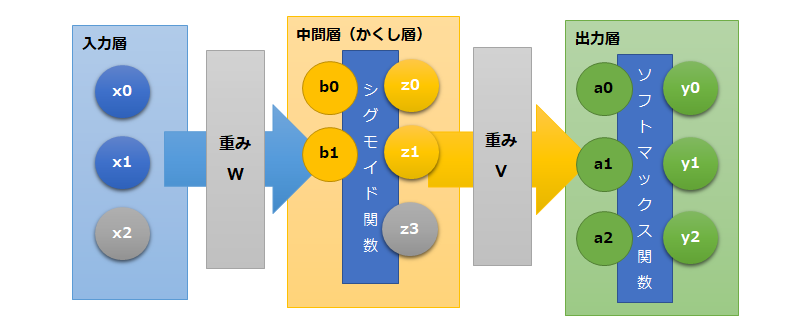

In [ ]:
# データ準備
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline
# アヤメ品種データの読み込み
from sklearn.datasets import load_iris

iris_data = load_iris()

# 説明変数
X_array = iris_data.data
# カラムデータを取得
X0=X_array[:,0]
X1=X_array[:,3]

# 目的変数
t_array = iris_data.target
T=t_array

N=len(X0)
petal_data=npy.zeros((N,2))
T3 = npy.zeros((N,3), dtype=npy.uint8)

#データの設定
for i in range(N):
  petal_data[i]=[X0[i], X1[i]]
    
  # 0[1,0,0]　1[0,1,0]　2[0,0,1]
  if T[i] == 0:
    T3[i]=[1,0,0]
  elif T[i] == 1:
    T3[i]=[0,1,0]
  else:
    T3[i]=[0,0,1]


X_range0=[min(X0)*0.9,max(X0)*1.1]
X_range1=[min(X1)*0.9,max(X1)*1.1]

# データをclassdata3.npzファイルに保存する
npy.savez('neural_rawdata.npz',X=petal_data,T3=T3,X_range0=X_range0,X_range1=X_range1,X_n=N)

In [ ]:
# 生データファイルから取り出す
sample_data = npy.load('neural_rawdata.npz')
# 入力値の設定
X=sample_data['X']
# がく片の長さの表示範囲設定
X_range0=sample_data['X_range0']
# 花弁の長さの表示範囲設定
X_range1=sample_data['X_range1']
# クラス（答え）の設定
T3=sample_data['T3']

# データの並び替え
X1 = X[:50,:]
X2 = X[50:100,:]
X3 = X[100:150,:]

npy.random.shuffle(X1)
npy.random.shuffle(X2)
npy.random.shuffle(X3)

X_test=npy.r_[X1[:25,:], X2[:25,:], X3[:25,:]]
X_train=npy.r_[X1[25:50,:],X2[25:50,:],X3[25:50,:]]
T_test=npy.r_[T3[:25,:], T3[50:75,:], T3[100:125,:]]
T_train=npy.r_[T3[25:50,:],T3[75:100,:],T3[125:150,:]]

npy.savez('neural_data.npz',X_train=X_train, T_train=T_train,X_test=X_test,T_test=T_test,X_range0=X_range0,X_range1=X_range1)

In [ ]:
# データの表示
def Show_data(x,t):
  wk,n=t.shape
  c=[[0,0,0],[.5,.5,.5],[1,1,1]]
  for i in range(n):
    plt.plot(x[t[:,i]==1,0],x[t[:,i]==1,1],linestyle='none',marker='o',markeredgecolor='black',color=c[i],alpha=0.8)
  plt.grid(True)

plt.figure(1,figsize=(8,3.7))
plt.subplot(1,2,1)
Show_data(X_train,T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1,2,2)
Show_data(X_test,T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')

plt.show()

In [ ]:
# シグモイド関数
def Sigmoid(x):
  y=1/(1+npy.exp(-x))
  return y

In [ ]:
# ニューラルネットワーク（wv重み、M中間層ノード数、K出力層ノード数、x入力層の入力値）
def FNN(wv, M, K, x):
  # Nデータ数　Dデータの入力次元
  N, D = x.shape
  # w 入力層⇒中間層の重み
  w = wv[:M * (D+1)]
  w = w.reshape(M,(D+1))
  # v 中間層⇒出力層の重み
  v = wv[M*(D+1):]
  v = v.reshape((K,M+1))
  # b 中間層の入力総和
  b = npy.zeros((N,M+1))
  # z 中間層の出力値
  z = npy.zeros((N,M+1))
  # a 出力層の入力総和
  a = npy.zeros((N,K))
  # y 出力層の出力値
  y = npy.zeros((N,K))
    
  # データごとに中間層、出力層の計算を行う
  for n in range(N):
    # 中間層の計算（シグモイド関数）
    for m in range(M):
      b[n,m] = npy.dot(w[m,:],npy.r_[x[n,:],1])
      z[n,m] = Sigmoid(b[n,m])
    # ダミーニューロン
    z[n,M]=1
    u=0
    # 出力層の計算（ソフトマックス関数）
    for k in range(K):
      a[n,k] = npy.dot(v[k,:],z[n,:])
      u = u + npy.exp(a[n,k])
    for k in range(K):
      y[n,k] = npy.exp(a[n,k])/u

  return y,a,z,b

In [ ]:
# テスト実行
WV = npy.ones(15)
M = 2
K = 3
FNN(WV,M,K,X_train[:2,:])

### 自分でニューラルネットワークを作ろう
https://qiita.com/takahiro_itazuri/items/d2bea1c643d7cca11352

# <font color = red>**！実行注意！**</font>

In [ ]:
import numpy as np

sigmoid_range = 34.538776394910684


class ActivationFunction:
  def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-np.clip(x, -sigmoid_range, sigmoid_range)))

  def derivative_sigmoid(o):
    return o * (1.0 - o)

In [ ]:
AF = ActivationFunction

# 3層ニューラルネットワーク
class ThreeLayerNetwork:
  # コンストラクタ
  def __init__(self, inodes, hnodes, onodes, lr):
    # 各レイヤーのノード数
    self.inodes = inodes
    self.hnodes = hnodes
    self.onodes = onodes

    # 学習率
    self.lr = lr

    # 重みの初期化
    self.w_ih = np.random.normal(0.0, 1.0, (self.hnodes, self.inodes))
    self.w_ho = np.random.normal(0.0, 1.0, (self.onodes, self.hnodes))

    # 活性化関数
    self.af = AF.sigmoid
    self.daf = AF.derivative_sigmoid


  # 誤差逆伝搬
  def backprop(self, idata, tdata):
    # 縦ベクトルに変換
    o_i = np.array(idata, ndmin=2).T
    t = np.array(tdata, ndmin=2).T

    # 隠れ層
    x_h = np.dot(self.w_ih, o_i)
    o_h = self.af(x_h)

    # 出力層
    x_o = np.dot(self.w_ho, o_h)
    o_o = self.af(x_o)

    # 誤差計算
    e_o = (t - o_o)
    e_h = np.dot(self.w_ho.T, e_o)

    # 重みの更新
    self.w_ho += self.lr * np.dot((e_o * self.daf(o_o)), o_h.T)
    self.w_ih += self.lr * np.dot((e_h * self.daf(o_h)), o_i.T)


  # 順伝搬
  def feedforward(self, idata):
    # 入力のリストを縦ベクトルに変換
    o_i = np.array(idata, ndmin=2).T

    # 隠れ層
    x_h = np.dot(self.w_ih, o_i)
    o_h = self.af(x_h)

    # 出力層
    x_o = np.dot(self.w_ho, o_h)
    o_o = self.af(x_o)

    return o_o

In [ ]:
import pandas as pd

# パラメータ
inodes = 784
hnodes = 100
onodes = 10
lr = 0.3

# ニューラルネットワークの初期化
nn = ThreeLayerNetwork(inodes, hnodes, onodes, lr)

# トレーニングデータのロード
training_data_file = pd.read_csv('https://pjreddie.com/media/files/mnist_train.csv')
training_data_list = training_data_file.values.tolist()

# テストデータのロード
test_data_file = pd.read_csv('https://pjreddie.com/media/files/mnist_test.csv')
test_data_list = test_data_file.values.tolist()

In [ ]:
# 学習
epoch = 10
for e in range(epoch):
  print('#epoch ', e)
  data_size = len(training_data_list)
  for i in range(data_size):
    if i % 1000 == 0:
      print('  train: {0:>5d} / {1:>5d}'.format(i, data_size))
    val = training_data_list[i]
    idata = (np.asfarray(val[1:]) / 255.0 * 0.99) + 0.01
    tdata = np.zeros(onodes) + 0.01
    tdata[int(val[0])] = 0.99
    nn.backprop(idata, tdata)
    pass
  pass


# テスト
scoreboard = []
for record in test_data_list:
  val = record
  idata = (np.asfarray(val[1:]) / 255.0 * 0.99) + 0.01
  tlabel = int(val[0])
  predict = nn.feedforward(idata)
  plabel = np.argmax(predict)
  scoreboard.append(tlabel == plabel)
  pass


scoreboard_array = np.asarray(scoreboard)
print('performance: ', scoreboard_array.sum() / scoreboard_array.size)

### Pythonでニューラルネットワークを実装する方法を現役エンジニアが解説【初心者向け】
https://techacademy.jp/magazine/20919

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

X, y = load_digits(return_X_y=True)

clf = Perceptron(tol=1e-3, random_state=0)

clf.fit(X, y)
clf.score(X, y)